In [26]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

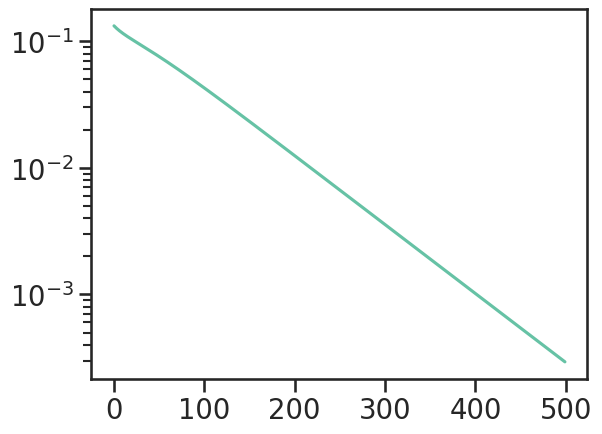

In [27]:
df = pd.read_hdf("fqe_time_evolve_h4.h5", key="df")

fig, ax = plt.subplots(1, 1)
ax.plot(df.step, df.rmse)
ax.set_yscale('log')

In [28]:
civec = df.iloc[499].civec.flatten()
plt.scatter(x=np.arange(civec.size), y=civec)

IndexError: single positional indexer is out-of-bounds

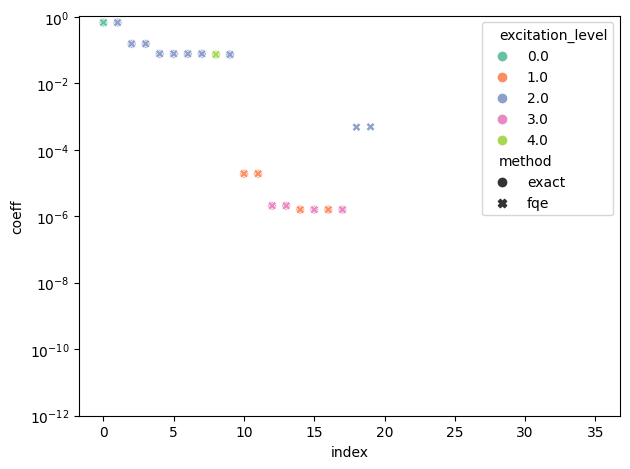

In [ ]:
ci = np.load("h4_sto3g_civec.npy")

ncas = 4
nelecas = (2, 2)

from pyscf.fci.cistring import gen_occslst
strs = gen_occslst(range(ncas), nelecas[0])
excilevels = np.array([
    np.sum(x > nelecas[0] - 1) for x in strs
])
excilevels = excilevels[:, None] + excilevels
excilevels = np.asarray(excilevels, dtype=int)

from tailoredcc.plot_utils import civec_scatter
fig, ax = plt.subplots(1, 1)
ax = civec_scatter({'exact': ci, 'fqe': df.iloc[499].civec}, ax=ax, s=40, excilevels=excilevels)
plt.savefig("blubbl.png")

In [ ]:
from pyscf.fci.cistring import make_strings
strs = make_strings(range(ncas), nelecas[0])
strs = np.array([bin(x) for x in strs])

cistrs = np.zeros_like(ci, dtype=object)
for ii, ast in enumerate(strs):
    for jj, bst in enumerate(strs):
        cistrs[jj, ii] = strs[ii], strs[jj]

In [ ]:
sort_idx = np.argsort(np.abs(ci.flatten()))[::-1]
cistrs = cistrs.flatten()[sort_idx]
cistrs

array([('0b11', '0b11'), ('0b101', '0b101'), ('0b110', '0b1001'),
       ('0b1001', '0b110'), ('0b101', '0b1010'), ('0b1010', '0b101'),
       ('0b1100', '0b11'), ('0b11', '0b1100'), ('0b1100', '0b1100'),
       ('0b1010', '0b1010'), ('0b101', '0b11'), ('0b11', '0b101'),
       ('0b1100', '0b1010'), ('0b1010', '0b1100'), ('0b11', '0b1010'),
       ('0b101', '0b1100'), ('0b1010', '0b11'), ('0b1100', '0b101'),
       ('0b1001', '0b1001'), ('0b110', '0b110'), ('0b1001', '0b11'),
       ('0b1001', '0b101'), ('0b110', '0b101'), ('0b101', '0b1001'),
       ('0b101', '0b110'), ('0b110', '0b11'), ('0b11', '0b110'),
       ('0b1010', '0b1001'), ('0b1001', '0b1010'), ('0b11', '0b1001'),
       ('0b1010', '0b110'), ('0b110', '0b1010'), ('0b1100', '0b110'),
       ('0b1001', '0b1100'), ('0b1100', '0b1001'), ('0b110', '0b1100')],
      dtype=object)

In [ ]:
print(cistrs[2])
excilevels.flatten()[sort_idx]

('0b110', '0b1001')


array([0, 2, 2, 2, 2, 2, 2, 2, 4, 2, 1, 1, 3, 3, 1, 3, 1, 3, 2, 2, 1, 2,
       2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 3, 3, 3, 3])

In [ ]:
civec.flatten()[sort_idx][11]

NameError: name 'civec' is not defined

In [ ]:
dfn = pd.read_hdf("fqe_time_evolve_noise_h4.h5", key="df")
dfn["error"] = np.abs(dfn.energy_ec - df.iloc[499].energy_ec)

dfn["error_fqe"] = np.abs(dfn.energy_ec - df.iloc[499].energy_fqe)

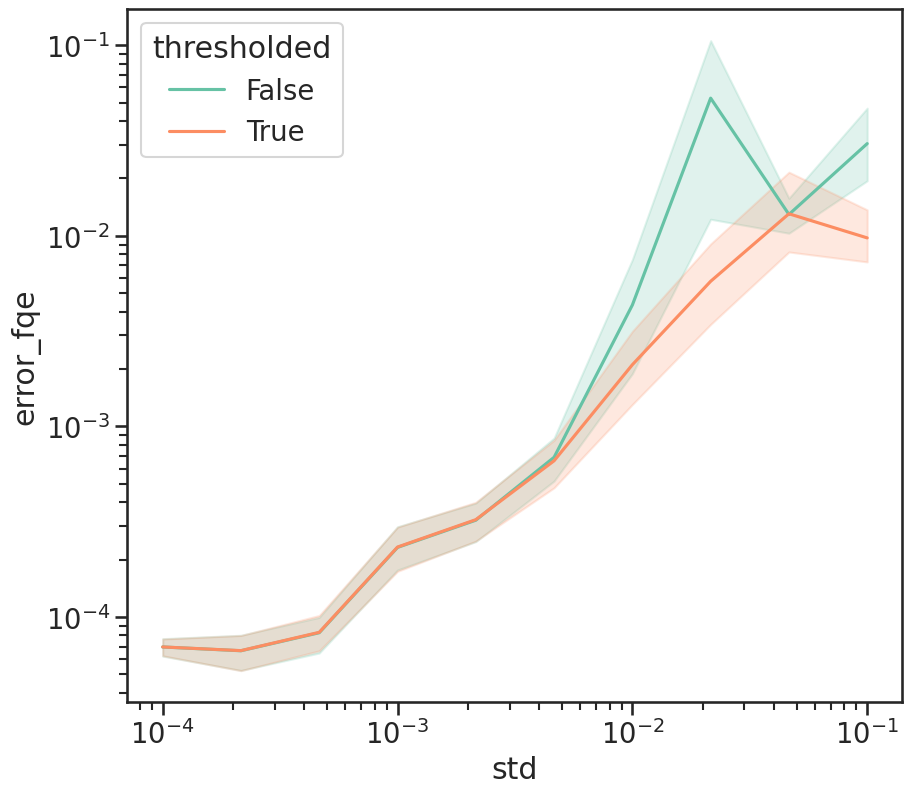

In [ ]:
sns.set_theme("talk", palette="Set2", font_scale=1.2, style="ticks")
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(10, 9)
sns.lineplot(data=dfn, x="std", y="error_fqe", hue="thresholded", ax=ax)
# sns.lineplot(data=dfn, x="std", y="error", hue="thresholded", style="converged", ax=ax)
# sns.boxplot(data=dfn, x="std", y="error", hue="thresholded", ax=ax)
ax.set_xscale('log')
ax.set_yscale('log')